In [2]:
import pandas as pd

In [3]:
import os

In [4]:
os.getcwd()

'/Users/darraghoneill'

In [5]:
# read the data using read_csv

Sales_data = pd.read_csv('/Users/darraghoneill/Python Project/Dataset/archive/grocery_sales_v1.csv', index_col=0, parse_dates=['new_order_date'])

In [6]:
# Use data.head() to read the first few values of the data

Sales_data.head()

,customer_name,new_order_date,order_year,month_name,order_month,order_day,category,sub_category,net_sales,discount,profit,total_sales,profit_percentage,region,city
order_id,,,,,,,,,,,,,,,
OD1,Harish,2017-11-08,2017,November,11,8,Oil & Masala,Masalas,852.72,0.12,401.28,1254,47.058824,North,Vellore
OD2,Sudha,2017-11-08,2017,November,11,8,Beverages,Health Drinks,599.20,0.18,149.80,749,25.000000,South,Krishnagiri
OD3,Hussain,2017-06-12,2017,June,6,12,Food Grains,Atta & Flour,2194.80,0.21,165.20,2360,7.526882,West,Perambalur
OD4,Jackson,2016-10-11,2016,October,10,11,Fruits & Veggies,Fresh Vegetables,806.40,0.25,89.60,896,11.111111,South,Dharmapuri
OD5,Ridhesh,2016-10-11,2016,October,10,11,Food Grains,Organic Staples,1436.55,0.26,918.45,2355,63.934426,South,Ooty


In [7]:
# How many rows and columns?

Sales_data.shape

(9994, 15)

In [8]:
# Use .isnull().sum() to count the missing values

missing_values_count=Sales_data.isnull().sum()

In [9]:
print(missing_values_count[0:])

customer_name        0
new_order_date       0
order_year           0
month_name           0
order_month          0
order_day            0
category             0
sub_category         0
net_sales            0
discount             0
profit               0
total_sales          0
profit_percentage    0
region               0
city                 0
dtype: int64


In [10]:
# check for duplicates

drop_duplicates = Sales_data.drop_duplicates()
print(Sales_data.shape, drop_duplicates.shape)

(9994, 15) (9994, 15)


In [11]:
# use .info() to review the data types

Sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, OD1 to OD9994
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_name      9994 non-null   object        
 1   new_order_date     9994 non-null   datetime64[ns]
 2   order_year         9994 non-null   int64         
 3   month_name         9994 non-null   object        
 4   order_month        9994 non-null   int64         
 5   order_day          9994 non-null   int64         
 6   category           9994 non-null   object        
 7   sub_category       9994 non-null   object        
 8   net_sales          9994 non-null   float64       
 9   discount           9994 non-null   float64       
 10  profit             9994 non-null   float64       
 11  total_sales        9994 non-null   int64         
 12  profit_percentage  9994 non-null   float64       
 13  region             9994 non-null   object        
 14  city     

In [83]:
# Group by Category and sub category

Sales_data.groupby(['category','sub_category'])['total_sales'].agg('mean', 'median')

category           sub_category      
Bakery             Biscuits              1490.376906
                   Breads & Buns         1479.254980
                   Cakes                 1516.840708
Beverages          Health Drinks         1462.363004
                   Soft Drinks           1518.170338
Eggs, Meat & Fish  Chicken               1495.681034
                   Eggs                  1517.562005
                   Fish                  1519.100271
                   Mutton                1551.269036
Food Grains        Atta & Flour          1514.586402
                   Dals & Pulses         1525.862974
                   Organic Staples       1502.497312
                   Rice                  1510.069697
Fruits & Veggies   Fresh Fruits          1493.799458
                   Fresh Vegetables      1485.429379
                   Organic Fruits        1446.557471
                   Organic Vegetables    1499.340058
Oil & Masala       Edible Oil & Ghee     1481.343681
        

In [14]:
import matplotlib.pyplot as plt

In [15]:
x = Sales_data['region']

In [16]:
y = Sales_data['total_sales']

In [17]:
# Assign the date of the first order to the variable 'First_order'

First_order = Sales_data["new_order_date"].min()

In [18]:
print(First_order)

2015-01-03 00:00:00


In [19]:
# Assign the date of the most recent order to the variable 'Last_order'

Last_order = Sales_data["new_order_date"].max()

In [20]:
print(Last_order)

2018-12-30 00:00:00


In [21]:
# From the above lines, we see the date includes orders for 3 years from 2015 to 2018

In [22]:
# Define a function 'pct50' to review the 0.5 quantile and verify using .median()

def pct50(column):
    return column.quantile(0.5)

In [23]:
Sales_data["total_sales"].agg(pct50)

1498.0

In [24]:
Sales_data["total_sales"].median()

1498.0

In [25]:
# Define a function 'pct25' to review the 0.25 quantile 

def pct25(column):
    return column.quantile(0.25)

In [26]:
# Define a function 'pct75' to review the 0.75 quantile 

def pct75(column):
    return column.quantile(0.75)

In [27]:
Sales_data["total_sales"].agg([pct25, pct50, pct75])

pct25    1000.00
pct50    1498.00
pct75    1994.75
Name: total_sales, dtype: float64

In [28]:
# Determine the number of orders per city, from highest to lowest

Orders_by_city = Sales_data["city"].value_counts(sort=True)

In [29]:
print(Orders_by_city)

Kanyakumari       459
Tirunelveli       446
Bodi              442
Krishnagiri       440
Vellore           435
Perambalur        434
Tenkasi           432
Chennai           432
Salem             431
Pudukottai        430
Karur             430
Coimbatore        428
Ramanadhapuram    421
Cumbum            417
Virudhunagar      416
Madurai           408
Ooty              404
Namakkal          403
Viluppuram        397
Dindigul          396
Theni             387
Dharmapuri        376
Nagercoil         373
Trichy            357
Name: city, dtype: int64


In [30]:
# Determine the number of orders per Category

Orders_by_category = Sales_data["category"].value_counts(sort=True)

In [31]:
print(Orders_by_category)

Snacks               1514
Eggs, Meat & Fish    1490
Fruits & Veggies     1418
Bakery               1413
Beverages            1400
Food Grains          1398
Oil & Masala         1361
Name: category, dtype: int64


In [32]:
# Determine the number of orders per Sub Category

Orders_by_sub_category = Sales_data["sub_category"].value_counts(sort=True)

In [33]:
print(Orders_by_sub_category)

Health Drinks         719
Soft Drinks           681
Cookies               520
Breads & Buns         502
Chocolates            499
Noodles               495
Masalas               463
Biscuits              459
Cakes                 452
Edible Oil & Ghee     451
Spices                447
Mutton                394
Eggs                  379
Organic Staples       372
Fresh Fruits          369
Fish                  369
Fresh Vegetables      354
Atta & Flour          353
Organic Fruits        348
Chicken               348
Organic Vegetables    347
Dals & Pulses         343
Rice                  330
Name: sub_category, dtype: int64


In [34]:
# Determine the number of orders per Region

Orders_by_region = Sales_data["region"].value_counts(sort=True)

In [35]:
print(Orders_by_region)

West       3203
East       2848
Central    2323
South      1619
North         1
Name: region, dtype: int64


In [70]:
# Determine the Regional profit

Profit_by_region = Sales_data.groupby("region")["profit"].sum().reset_index()
Profit_by_region_sorted=Profit_by_region.sort_values("profit", ascending = False)
print(Profit_by_region_sorted)

    region      profit
4     West  1192004.61
1     East  1074345.58
0  Central   856806.84
3    South   623562.89
2    North      401.28


In [71]:
# Based on the output above, we can see that the profitability per region is driven by the volume of orders

In [82]:
Sales_data.groupby(["category","region"])["total_sales"].agg([min, max, sum])

min   max     sum
category          region                     
Bakery            Central   505  2494  448343
                  East      501  2496  588241
                  South     504  2500  361385
                  West      501  2498  714312
Beverages         Central   510  2500  501194
                  East      502  2500  577206
                  South     503  2493  344666
                  West      505  2481  662247
Eggs, Meat & Fish Central   508  2499  516642
                  East      500  2491  677830
                  South     508  2496  360963
                  West      502  2499  711966
Food Grains       Central   502  2497  463683
                  East      502  2493  598868
                  South     501  2499  353069
                  West      507  2495  699652
Fruits & Veggies  Central   505  2498  526507
                  East      509  2491  564237
                  South     500  2492  352162
                  West      503  2500  657821
Oil & Masala      Central   506  2482  453293
                  East      504  2500  622071
                  North    1254  1254    1254
                  South     524  2493  298859
                  West      500  2500  662965
Snacks            Central   501  2500  558494
                  East      500  2488  619915
                  South     508  2487  369357
                  West      503  2500  689780

In [73]:
Sales_data.pivot_table(values="total_sales", index="category", columns = "region", fill_value=0, margins=True)

region,Central,East,North,South,West,All
category,,,,,,
Bakery,1450.948220,1500.614796,0,1505.770833,1513.372881,1494.891012
Beverages,1461.206997,1499.236364,0,1518.352423,1488.195506,1489.509286
"Eggs, Meat & Fish",1560.851964,1509.643653,0,1549.197425,1492.591195,1521.745638
Food Grains,1495.751613,1523.837150,0,1521.849138,1511.127430,1513.070100
Fruits & Veggies,1483.118310,1469.367188,0,1504.965812,1478.249438,1481.471791
Oil & Masala,1510.976667,1495.362981,1254,1479.500000,1499.920814,1497.753123
Snacks,1489.317333,1445.023310,0,1471.541833,1502.788671,1477.903567
All,1492.964270,1491.702247,1254,1507.387894,1498.202623,1496.596158


In [74]:
import seaborn as sns

<AxesSubplot:xlabel='new_order_date', ylabel='total_sales'>

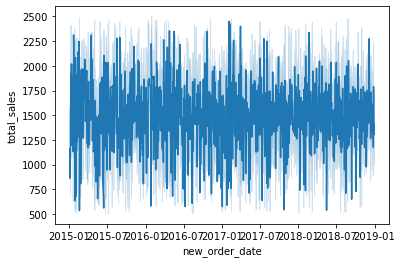

In [75]:
sns.lineplot(data=Sales_data, x="new_order_date", y="total_sales")

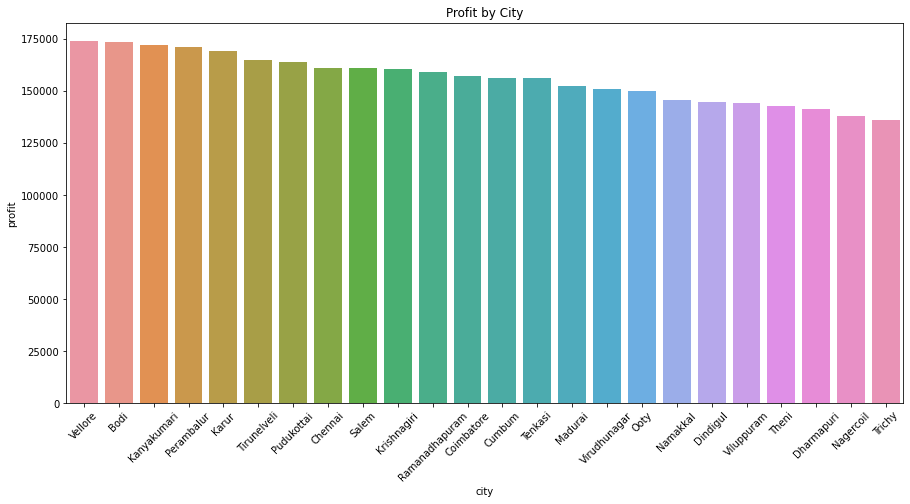

In [76]:
city = Sales_data.groupby('city')['profit'].sum().reset_index().sort_values('profit',ascending=False).reset_index(drop=True)
plt.figure(figsize=(15,7))
g = sns.barplot(data=city,x='city',y='profit')

plt.title('Profit by City')
plt.xticks(rotation=45)
plt.show()

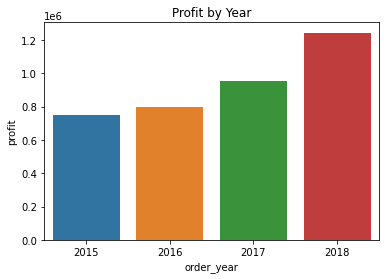

In [77]:
year = Sales_data.groupby('order_year')['profit'].sum().reset_index()
g = sns.barplot(data=year,x='order_year',y='profit')
plt.title('Profit by Year')
plt.show()

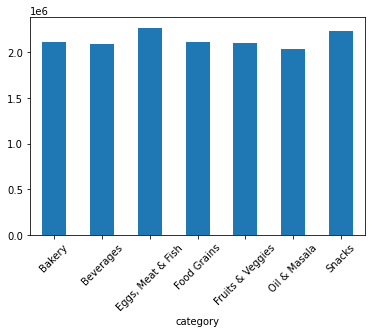

In [78]:
# Product category with highest Sales
sales_category=Sales_data.groupby("category")["total_sales"].sum()
sales_category.plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

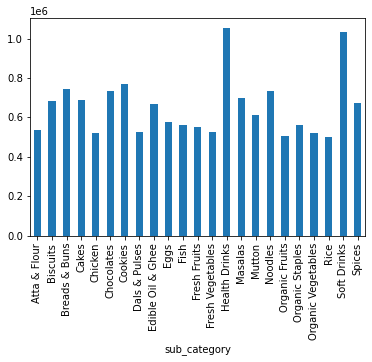

In [79]:
# Product sub-category with highest Sales
sales_sub_category=Sales_data.groupby("sub_category")["total_sales"].sum()
sales_sub_category.plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

In [80]:
# the above graph shows highest sales in sub-categories of Health drinks and Soft drinks